In [1]:
# Import libraries
from pathlib import Path
import os, re, string, collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [2]:
# Load the 20th century data
with open("../Data/20th_century_page.txt", "r", encoding="utf-8", errors="ignore") as f:
    text = f.read()

print("File successfully loades!")
print(text[:300])

File successfully loades!
Key events of the 20th century - Wikipedia Close November 10th, 1:03 pm: “Wikipedia still can't be sold.” - An important update for readers in Germany. Please don't skip this 1-minute read. It's Wednesday and if you're like us, you've used Wikipedia countless times. To settle an argument with a frie


In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mais1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mais1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\mais1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [4]:
# Tokenize
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text.lower())

print(tokens[:20])

['key', 'events', 'of', 'the', '20th', 'century', '-', 'wikipedia', 'close', 'november', '10th', ',', '1:03', 'pm', ':', '“', 'wikipedia', 'still', 'ca', "n't"]


In [5]:
# Frequency distribution using NLTK FreqDist
from nltk.probability import FreqDist

# Make a frequency distribution from your tokens
dist_words = FreqDist(tokens)

# Show the 10 most common words
print("\nTop 10 most common words:")
print(dist_words.most_common(10))


Top 10 most common words:
[('.', 1627), ('the', 1500), (',', 1016), ('of', 649), ('and', 443), ('to', 363), ('in', 361), ('[', 309), (']', 309), ('``', 286)]


d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


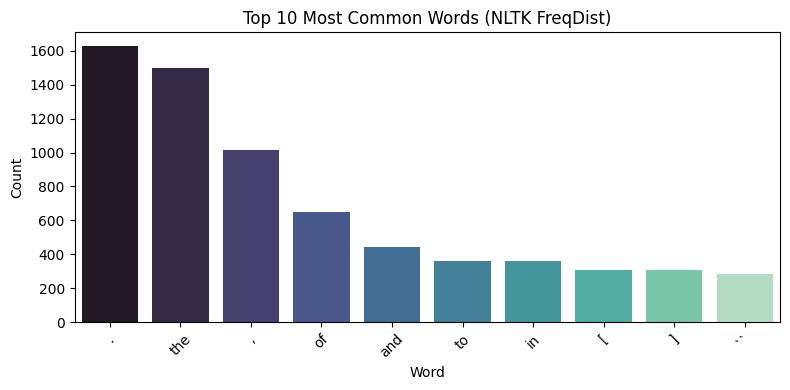

In [6]:
# Convert the FreqDist to a DataFrame for easier plotting
df_freq = pd.DataFrame(dist_words.most_common(10), columns=["Word", "Count"])

# Import function
from my_functions import top_n_barplot

# Call function
top_n_barplot(df_freq, "Word", "Count", "Top 10 Most Common Words (NLTK FreqDist)")


In [7]:
# Remove stopwords and punctuation
from nltk.corpus import stopwords
import string

# get english stop words
stop_words = set(stopwords.words('english'))

# create a filtered list: keep only words that are NOT stopwords or punctuation
filtered_words = [word for word in tokens if word not in stop_words and word not in string.punctuation]

print("\nFirst 20 filtered words:\n", filtered_words[:20])


First 20 filtered words:
 ['key', 'events', '20th', 'century', 'wikipedia', 'close', 'november', '10th', '1:03', 'pm', '“', 'wikipedia', 'still', 'ca', "n't", 'sold.', '”', 'important', 'update', 'readers']


In [8]:
import re

filtered_words = [
    word for word in tokens
    if re.fullmatch(r"[a-z]+", word) and word not in stop_words
]
print("\nFirst 20 filtered words:\n", filtered_words[:20])


First 20 filtered words:
 ['key', 'events', 'century', 'wikipedia', 'close', 'november', 'pm', 'wikipedia', 'still', 'ca', 'important', 'update', 'readers', 'germany', 'please', 'skip', 'read', 'wednesday', 'like', 'us']


d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


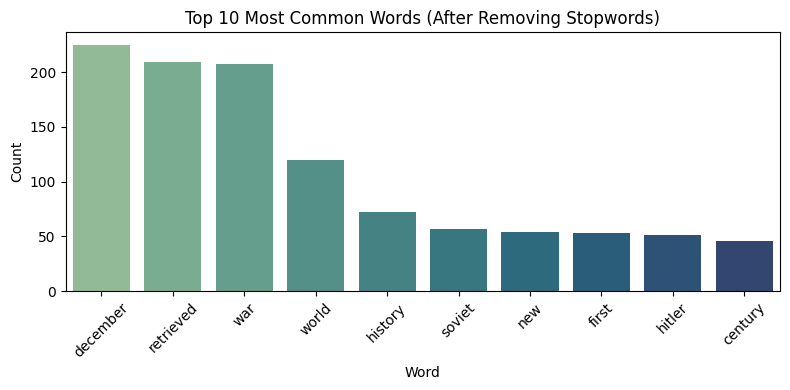

In [9]:
# Bar chart for filtered words
from nltk.probability import FreqDist
import pandas as pd


# import function
from my_functions import top_n_barplot 

# Create frequency distribution
dist_words_filtered = FreqDist(filtered_words)

# Convert to DataFrame
df_filtered = pd.DataFrame(dist_words_filtered.most_common(10), columns=["Word", "Count"])

# Call reusable function 
top_n_barplot(
    df_filtered,
    "Word",
    "Count",
    "Top 10 Most Common Words (After Removing Stopwords)",
    palette="crest"
)


My Impressions:
After removing stopwords, the most frequent words reveal the main topics of the text.
Common function words like the, and, of disappeared, leaving more meaningful words.
The most frequent terms now highlight key themes such as war, world, time, and people,
which align with the historical context of the 20th century.

In [10]:
# POS tagging 
from textblob import TextBlob

blob = TextBlob(" ".join(filtered_words))
tags = blob.tags  # returns a list of (word, POS) tuples

print("\nFirst 15 tags:\n", tags[:15])


First 15 tags:
 [('key', 'JJ'), ('events', 'NNS'), ('century', 'NN'), ('wikipedia', 'VBP'), ('close', 'JJ'), ('november', 'JJ'), ('pm', 'NN'), ('wikipedia', 'NN'), ('still', 'RB'), ('ca', 'MD'), ('important', 'JJ'), ('update', 'JJ'), ('readers', 'NNS'), ('germany', 'JJ'), ('please', 'JJ')]


In [11]:
# Convert POS tags to DataFrame
import pandas as pd

df_text = pd.DataFrame(tags, columns=['Word', 'Word type'])

df_t = df_text.groupby('Word type').count().reset_index()

top20 = df_t.nlargest(20, 'Word')

print(top20)

   Word type  Word
9         NN  3902
5         JJ  2350
11       NNS  1149
18       VBD   725
13        RB   468
21       VBP   420
19       VBG   290
20       VBN   253
4         IN   175
17        VB   133
10       NNP    93
8         MD    89
22       VBZ    88
1         CD    85
7        JJS    39
3         FW    22
12       PRP    22
16        RP     9
2         DT     8
14       RBR     8


d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


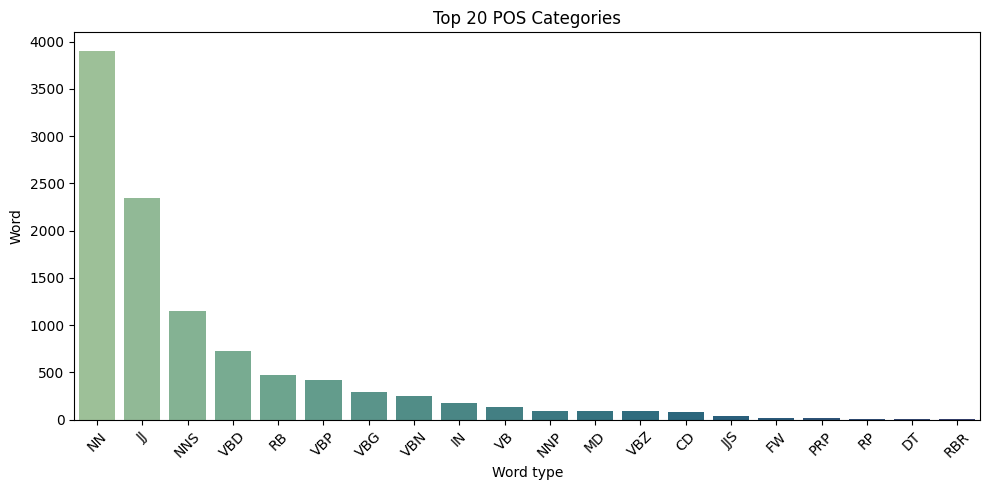

In [12]:
# Create Bar chart
from my_functions import top_n_barplot

top_n_barplot(
    data=top20,
    x="Word type",
    y="Word",
    title="Top 20 POS Categories",
    figsize=(10,5),
    palette="crest"
)

In [13]:
# Select nouns, verbs and adjectives
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# POS tag sets
noun_tags = {"NN", "NNS", "NNP", "NNPS"}
verb_tags = {"VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}
adj_tags  = {"JJ", "JJR", "JJS"}

# Top 15 POS labels
def top_words_by_pos(tags, pos_set, n=15):
    words = [word for (word, pos) in tags if pos in pos_set]
    return Counter(words).most_common(n)

# Create lists
top15_nouns = top_words_by_pos(tags, noun_tags)
top15_verbs = top_words_by_pos(tags, verb_tags)
top15_adjs  = top_words_by_pos(tags, adj_tags)

d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


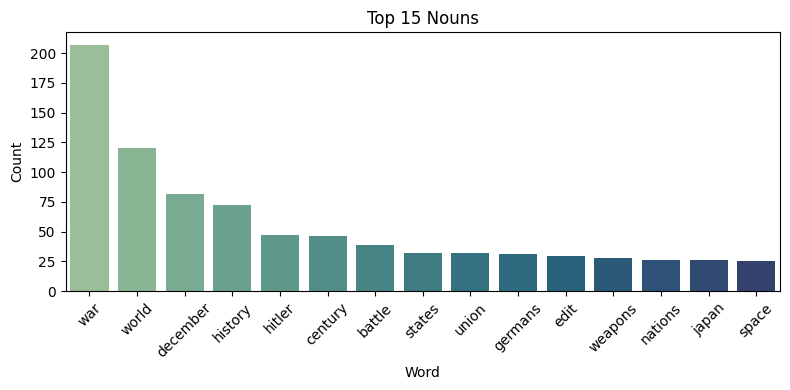

d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


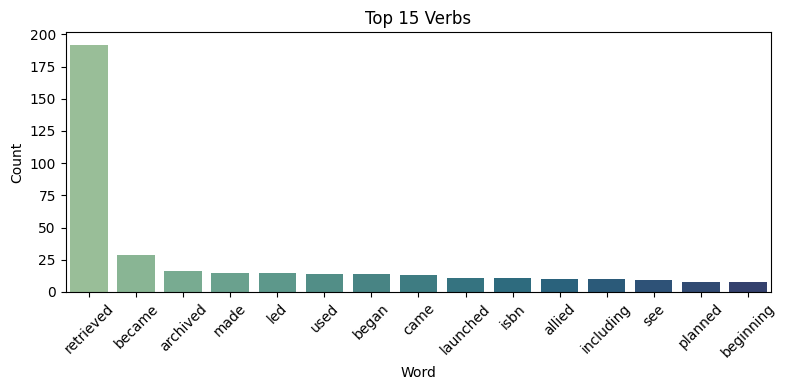

d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


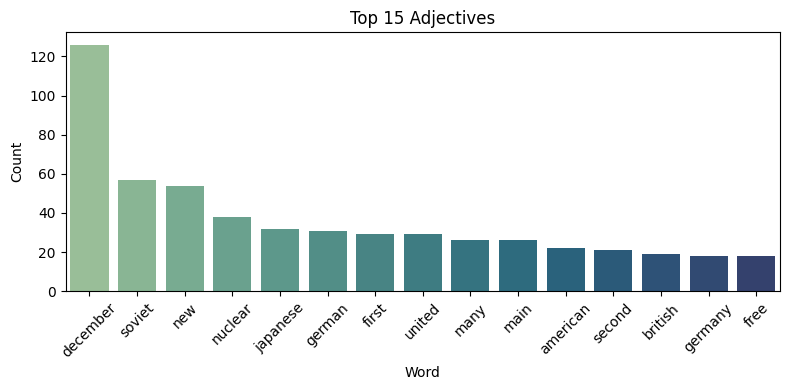

In [14]:
from my_functions import top_n_barplot
import pandas as pd

# Nouns
df_nouns = pd.DataFrame(top15_nouns, columns=["Word", "Count"])
top_n_barplot(df_nouns, "Word", "Count", "Top 15 Nouns", palette="crest")

# Verbs
df_verbs = pd.DataFrame(top15_verbs, columns=["Word", "Count"])
top_n_barplot(df_verbs, "Word", "Count", "Top 15 Verbs", palette="crest")

# Adjectives
df_adjs = pd.DataFrame(top15_adjs, columns=["Word", "Count"])
top_n_barplot(df_adjs, "Word", "Count", "Top 15 Adjectives", palette="crest")

Nouns are by far the most frequent, with words like war, world, and december, reflecting the descriptive  nature of the text.
Verbs appear less frequently and are mostly in past tense (retrived, became, archived), emphasizing historical narration rather than present actions.
The top adjectives are December, Soviet, and new.
Interestingly, December is tagged as an adjective, although it can also function as a noun when referring to the month itself. This shows how the same word can play different grammatical roles depending on the context.

In [17]:
# Load the countries lookup list
countries_path = "../Data/countries_lookup.csv"
countries_df = pd.read_csv(countries_path)

print(countries_df.head(10))

       country
0     Abkhazia
1       Adjara
2       Adygea
3  Adélie Land
4  Afghanistan
5      Agaléga
6     Akrotiri
7      Albania
8     Alderney
9      Algeria


In [18]:
# Count mentions in the text
import re
def count_country_mentions(country):
    pattern = r"\b" + re.escape(country) + r"\b"
    return len(re.findall(pattern, text, flags=re.IGNORECASE))

countries_df["Mentions"] = countries_df["country"].apply(count_country_mentions)

# Show top 15 countries
top_countries = countries_df.sort_values("Mentions", ascending=False).head(15)
print(top_countries)

           country  Mentions
125        Germany        45
161          Japan        33
339  United States        23
116         France        17
158          Italy        14
257         Poland        13
346        Vietnam        13
74           China        10
151          India         9
268         Russia         9
233    North Korea         6
186          Libya         5
255    Philippines         5
27         Austria         5
239         Norway         5


d:\Data_Projects\20th_century_project\Scripts\my_functions.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


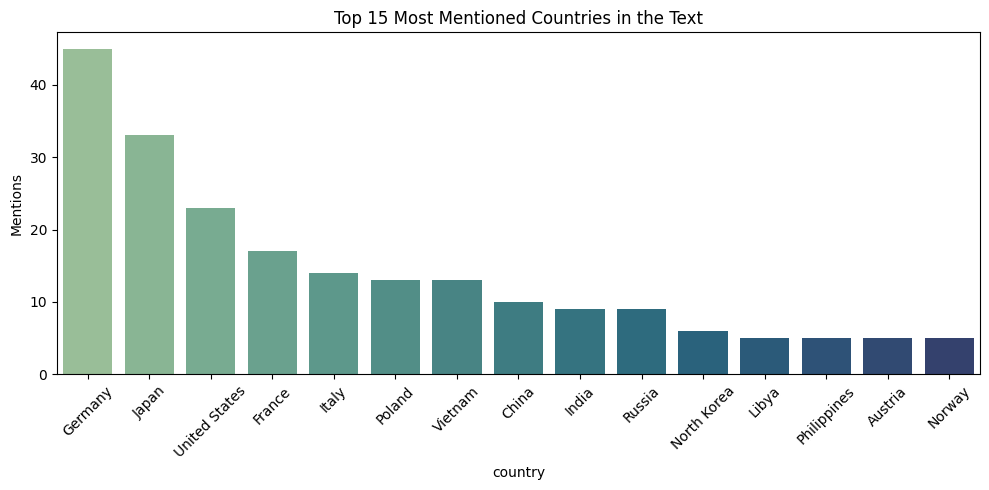

In [19]:
# Create plot
from my_functions import top_n_barplot

top_n_barplot(
    data=top_countries,
    x="country",
    y="Mentions",
    title="Top 15 Most Mentioned Countries in the Text",
    figsize=(10,5),
    palette="crest"
)

The results show that countries most frequently mentioned (Germany, Japan, United States) in the 20th-century text correspond to major participants in global conflicts at that era, especially during both World Wars.